### **Task - 3**

**Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonalised**

Comparing the modal prices (raw and de-seasonalised) in APMC Commodity cluster with MSP(Minimum Support Price) of the commodities through graphs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

style.use('seaborn-poster') #sets the size of the chart
style.use('ggplot') #styling

In [6]:
df=pd.read_csv("deseasonalize_data.csv")
df["date"]=pd.to_datetime(df["date"])

msp_data = pd.read_csv("CMO_MSP_Mandi_filtered.csv")
msp_data['commodity'] = msp_data['commodity'].str.lower()
msp_data["year"] = pd.to_datetime(msp_data["year"], format='%Y')
msp_data.head()

# Removing 2012, 2013's data as we don't have modal prices for those years
data_msp = msp_data[msp_data['year'] != 2012]
data_msp = data_msp[msp_data['year'] != 2013]
data_msp["year"]=pd.to_datetime(msp_data["year"], format= '%Y')
msp_data.head()

,commodity,year,Type,msprice,msp_filter
0,paddy-unhusked,2012-01-01,Kharif Crops,1250.0,1
1,rice(paddy-hus),2012-01-01,Kharif Crops,1280.0,1
2,jowar_hybrid,2012-01-01,Kharif Crops,1500.0,1
3,sorgum(jawar),2012-01-01,Kharif Crops,1520.0,1
4,bajri,2012-01-01,Kharif Crops,1175.0,1


In [3]:
df.head()

,APMC,Commodity,combination_label,date,modal_price,quarter,deseasonalise_price
0,Akole,bajri,Akole:bajri,2014-09-01,1650.0,3,1664.590398
1,Akole,bajri,Akole:bajri,2014-10-01,1560.0,4,1588.085197
2,Akole,bajri,Akole:bajri,2014-11-01,1550.0,4,1572.191403
3,Akole,bajri,Akole:bajri,2014-12-01,1563.0,4,1536.385799
4,Akole,bajri,Akole:bajri,2015-01-01,1580.0,1,1607.065791


In [17]:
def compare_price(apmc,commodity):
    label = str(apmc)+":"+str(commodity)
    data_filter = df[df["combination_label"]==label]
    
    # If no such match found within our data due to:
    # 1. Insufficient MSP data
    # 2. Invalid apmc,commodity cluster
    # 3. Apmc, commodity group which has already been filtered out during pre processing
    
    if data_filter.shape[0]==0:
        return "Not enough data"
    
    msp = msp_data[msp_data['commodity'] == commodity]
    msp = msp[['year', 'msprice']]
    
    xaxis = pd.to_datetime(data_filter['date'])
    plt.figure(figsize=(9,7))
    plt.plot(data_filter['date'], data_filter['modal_price'])
    plt.plot(data_filter['date'], data_filter['deseasonalise_price'])
    plt.plot(msp['year'],msp['msprice'])
    plt.xticks(rotation=45)
    plt.legend(['Actual price','De-seasonalised price','msprice'])
    plt.show()

Enter APMC: Akole
Enter commodity within the APMC bajri


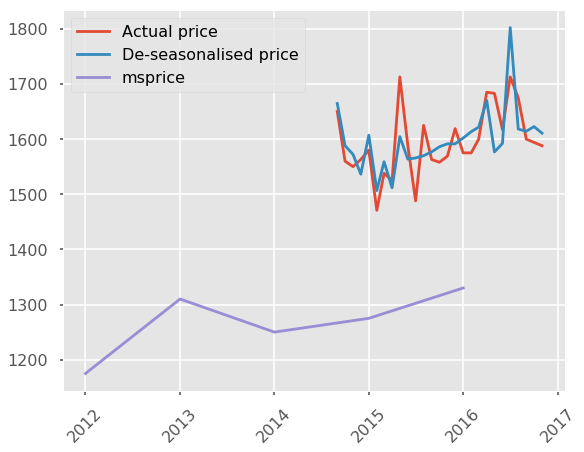

In [18]:
apmc = input("Enter APMC: ")
commodity = input("Enter commodity within the APMC ")

compare_price(apmc,commodity)

In [43]:
#"""commodities = msp_data['commodity'].unique().tolist()
#indices=df.index.tolist()
#msp_indices=msp_data.index.tolist()"""


In [42]:
#data_main = pd.DataFrame()
#data_main = df
#data_main["modal_compare"] = ""
#data_main["deseasonalize_compare"] = ""

#for index,commodity in zip(indices,commodities):
#    if(df.at[index,"Commodity"]==commodity):
#        for msp_index in zip(msp_indices):
 #           msprice = msp_data.loc[msp_data.commodity==commodity,'msprice'].values[0]
  #      if(df.at[index,'modal_price']>=msprice):
   #         data_main.at[index, "modal_compare" ] = "above msp"
    #    else:
     #       data_main.at[index, "modal_compare" ] = "below msp"
#    if(df.at[index,"Commodity"]==commodity):
#        for msp_index in zip(msp_indices):
#             msprice = msp_data.loc[msp_data.commodity==commodity,'msprice'].values[0]
#        if(df.at[index,'deseasonalise_price']>=msprice):
#            data_main.at[index, "deseasonalize_compare" ] = "above msp"
#        else:
#            data_main.at[index, "deseasonalize_compare" ] = "below msp"